# Assignment 7: Classification with Support Vector Machines

# Total: 11 Marks 
## Instructions

* Complete the assignment
* Once the notebook is complete, restart your kernel and rerun your cells
* Submit this notebook to owl by the deadline

## The Dataset

This dataset consists of 3921 e-mails to a single account, some of which are spam. These data represent incoming emails for the first three months of 2012 for an email account.

The table has 3921 (1252) observations on the following 21 variables.

* spam: Indicator for whether the email was spam.
* to_multiple: Indicator for whether the email was addressed to more than one recipient.
* from: Whether the message was listed as from anyone (this is usually set by default for regular outgoing email).
* cc: Indicator for whether anyone was CCed.
* sent_email: Indicator for whether the sender had been sent an email in the last 30 days.
* time: Time at which email was sent.
* image: The number of images attached.
* attach: The number of attached files.
* dollar: The number of times a dollar sign or the word “dollar” appeared in the email.
* winner: Indicates whether “winner” appeared in the email.
* inherit: The number of times “inherit” (or an extension, such as “inheritance”) appeared in the email.
* viagra: The number of times “viagra” appeared in the email.
* password: The number of times “password” appeared in the email.
* num_char: The number of characters in the email, in thousands.
* line_breaks: The number of line breaks in the email (does not count text wrapping).
* format: Indicates whether the email was written using HTML (e.g. may have included bolding or active links).
* re_subj: Whether the subject started with “Re:”, “RE:”, “re:”, or “rE:”
* exclaim_subj: Whether there was an exclamation point in the subject.
* urgent_subj: Whether the word “urgent” was in the email subject.
* exclaim_mess: The number of exclamation points in the email message.
* number: Factor variable saying whether there was no number, a small number (under 1 million), or a big number.

The data are from this R package: https://cran.r-project.org/web/packages/openintro/openintro.pdf

In [2]:
# You may need these
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import recall_score, make_scorer, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import  MinMaxScaler
import seaborn as sns;

import matplotlib.pyplot as plt
%matplotlib inline

## Part A: 1 Mark

Read in the `email.txt` dataset.

In [3]:

df = pd.read_csv('email.txt', delimiter = "\t").drop(['time','number','winner'],axis =1)

df.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess
0,0,0,1,0,0,0,0,0,0,0,0,11.370,202,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,10.504,202,1,0,0,0,1
2,0,0,1,0,0,0,0,4,1,0,0,7.773,192,1,0,0,0,6
3,0,0,1,0,0,0,0,0,0,0,0,13.256,255,1,0,0,0,48
4,0,0,1,0,0,0,0,0,0,0,2,1.231,29,0,0,0,0,1


## Part B: 1 Mark

Split the data into train and test.  Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the solution.

In [4]:
X = df.drop('spam', axis=1).astype('float').values
y = df.spam.values

Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y, 
                                                test_size=0.5, 
                                                random_state=0)

## Part C: 1 Mark

Create a pipeline for your support vector machine.  You can start with a `kernel="linear"` and `gamma="auto"`.

In [5]:
scale_svc_pipe = Pipeline([
    ('scale', MinMaxScaler(feature_range=(-1,1))),
    ('MySVC', SVC(kernel='linear', gamma = 'auto', C = 1) )
])

model = scale_svc_pipe.fit(Xtrain,ytrain)
ypreds = scale_svc_pipe.predict(Xtrain)

## Part D: 3 Marks

Use your model to construct a confusion matrix by fitting and predicting on the training data (I've inlcluded a little helper function to make looking at the confusion matrix a little easier). Then answer the following using the confusion matrix (don't use sklearn's functions):

* What is your model's training accuracy?
* What is your model's training precision?
* What is your model's training recall?


Confusion matrix, without normalization
model accuracy is: 0.91
model precision is: 1.0
model recall is: 0.02


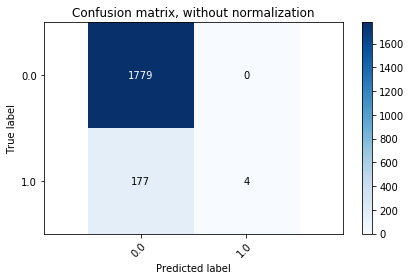

In [6]:
def plot_confusion_matrix(y_true, y_pred, classes=np.array([0.0,1.0]), normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    ax.axis('equal')
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    return ax


plot_confusion_matrix(ytrain, ypreds, classes=np.array([0.0,1.0]), normalize=False)
mycm = confusion_matrix(ytrain, ypreds)

model_accuracy = np.diag(mycm).sum()/mycm.sum()
model_precision = mycm[1,1]/np.sum(mycm[:,1])
model_recall = mycm[1,1]/np.sum(mycm[1,:])


print("model accuracy is:",model_accuracy.round(2))
print("model precision is:",model_precision.round(2))
print("model recall is:",model_recall.round(2))


## Part E:  1 Mark

Estimate your support vector machine's out of sample recall by using 5 fold cross validation.

In [7]:
cv_scores = cross_val_score(scale_svc_pipe, Xtrain, ytrain, cv = 5, scoring=make_scorer(recall_score)).round(2)

print(f"Model CV recall is {cv_scores.mean():.2f}")

Model CV recall is 0.01


## Part F: 2 Marks

  Use sklearn's `GridSearchCV` to search over the kernel and gamma. Search over `kernel = ['rbf','sigmoid']` and `gamma = np.linspace(1e-5, 1e-2)`.  Use recall as your metric for scoring.
  

`GridSearchCV` is a way to cross validate your models for a variety of parameters.  Read more about `GridSearchCV` [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).


In [8]:


scale_svc_pipe2 = Pipeline([
    ('scale', MinMaxScaler(feature_range=(-1,1))),
    ('MySVC', SVC(C = 1,max_iter = 1000))
])

gamma = np.linspace(0.1, 1000)
kernel = ['linear', 'rbf']
param_grid = {'MySVC__kernel':kernel,'MySVC__gamma' : gamma}

grid_search = GridSearchCV(scale_svc_pipe2,
                           param_grid = param_grid, 
                           cv=5, 
                           scoring=make_scorer(recall_score),
                          n_jobs =-1,
                          iid =True)
grid_search.fit(Xtrain,ytrain)

/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(-1, 1))),
                                       ('MySVC',
                                        SVC(C=1, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=1000,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0....
       7.34720408e+02, 7.55126531e+02, 7.75532653e+02, 7.95938776e+02,
       8.16344898e+02, 8.36751

## Part G: 1 Mark

What was the cross validated recall for your regularized model?  If you called your model grid search `svc_gscv` you can access the best model's score by performing `svc_gscv.best_score_`.


In [9]:
print(f'SVC model recall is {grid_search.best_score_:.2f}')

SVC model recall is 0.31


## Part H: 1 Mark

You can access the results of the cross validation `.cv_results_` method. If you called your estimator `svc_gcsv` then call `svc_gscv.cv_results_`.  This will return a dictionary.  You can turn it into a dataframe using `pandas.DataFrame` (this will make it easier to manipulate).  Learn more about `.cv_results_` [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Plot how the mean test error changes as `gamma` changes.  Color the lines according to `kernel`. What do you see happening to the cross validated error as gamma increases?

In [10]:
svc_df = pd.DataFrame(grid_search.cv_results_)
svc_df.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_MySVC__gamma,param_MySVC__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023545,0.003931,0.004607,0.000786,0.1,linear,"{'MySVC__gamma': 0.1, 'MySVC__kernel': 'linear'}",0.027027,0.000000,0.027778,0.000000,0.000000,0.010975,0.013429,50
1,0.034027,0.002051,0.006392,0.000273,0.1,rbf,"{'MySVC__gamma': 0.1, 'MySVC__kernel': 'rbf'}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100
2,0.020831,0.003597,0.004211,0.000535,20.5061,linear,"{'MySVC__gamma': 20.506122448979593, 'MySVC__k...",0.027027,0.000000,0.027778,0.000000,0.000000,0.010975,0.013429,50
3,0.053605,0.004216,0.008809,0.000194,20.5061,rbf,"{'MySVC__gamma': 20.506122448979593, 'MySVC__k...",0.189189,0.194444,0.111111,0.194444,0.111111,0.160100,0.040003,46
4,0.020785,0.001794,0.003945,0.000158,40.9122,linear,"{'MySVC__gamma': 40.912244897959184, 'MySVC__k...",0.027027,0.000000,0.027778,0.000000,0.000000,0.010975,0.013429,50


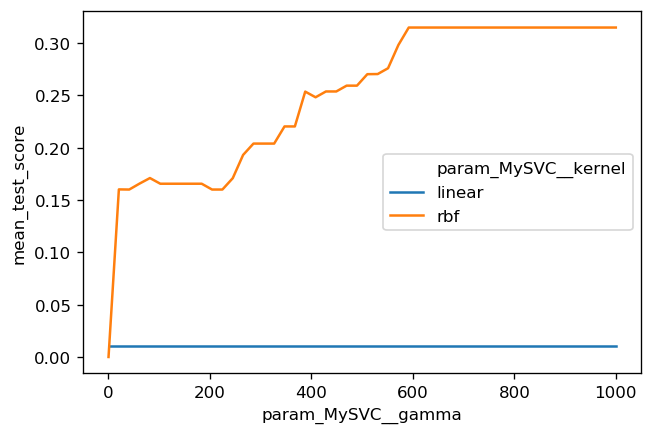

In [11]:
fig, ax = plt.subplots(dpi = 120)
y = svc_df.mean_test_score
ax = sns.lineplot(x="param_MySVC__gamma", y=y, hue="param_MySVC__kernel", data=svc_df)

#ax.plot(svc_df.param_MySVC__gamma, svc_df.mean_test_score, color = svc_df.param_MySVC__kernel)

In [12]:
#What do you see happening to the cross validated error as gamma increases?

#when the gamma is larger, when we using rbf kernel,the cross validate error is going down rapidly and be stable after
#gamma bigger than almost 600
#but for the linear kenel, the error is not changed with gamma's change.